**Plotting function**

The function defined here takes `activations`, `task_labels` and and generates a heatmap that gives the fraction of examples across each task for which each unit is "on" after k-Winners.

In [3]:
import numpy as np
import torch

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


def plot(activations, task_labels):

    # STEP 1: compute the array that we're going to plot
    with torch.no_grad():
        device = activations.device
        num_tasks = 1 + task_labels.max().item()
        _, num_units = activations.size()
        h = torch.zeros((0, num_units))
        h = h.to(device)
        for t in range(num_tasks):
            inds_t = torch.nonzero((task_labels == t).float(), as_tuple=True)
            h_t = activations[inds_t]
            h_t = (h_t != 0).float()
            h_t = h_t.mean(dim=0)
            h_t = h_t.unsqueeze(0)
            h = torch.cat((h, h_t))

    # STEP 2: plotting
    NUM_UNITS_TO_PLOT = 64
    h = h[:, :NUM_UNITS_TO_PLOT]
    h = h.detach().cpu().numpy()

    max_val = np.abs(h).max()
    plt.imshow(h, cmap="Greens", vmin=0.0, vmax=max_val)

    plt.xlabel("Hidden unit")
    plt.ylabel("Task")

    # These next 2 lines stretch the figure vertically
    ax = plt.gca()
    ax.set_aspect(2.5)

    ax.get_yaxis().set_ticks(range(0, 10))
    
    plt.tight_layout()
    plt.show()

**Generating plots with saved data**

The centroid script outputs `.pt` files which represent the activations and task labels. Specify these below to generate plots. Make sure that the 'key' in the file name is the same for both the activations and task labels.

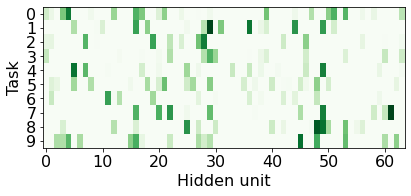

In [6]:
if __name__ == "__main__":

    # Load activations and task labels, then plot

    # NOTE: the user must edit the key below
    key = "abcd"

    activations = torch.load(f"x_10__activations.1_{key}.pt", map_location=torch.device("cpu"))
    task_labels = torch.load(f"y_10__activations.1_{key}.pt", map_location=torch.device("cpu"))

    plt.cla()
    plot(activations, task_labels)